In [1]:
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import librosa

In [83]:
filename='denoised/flow_/s5_prav4n.csv'
#raw_data=np.load(filename)
#data=pd.DataFrame(raw_data[:,:-1],columns=['timestamp','X','Y'])

data=pd.read_csv(filename)

In [84]:
# convert timestemps in second
data.timestamp=data.apply(lambda x: x.timestamp*1e-6,axis=1)

In [85]:
last_time=data.iloc[-1].timestamp
windows_shift=0.01
n_fft=512
n_frames=math.ceil(last_time/windows_shift)
print('Number of frames = ',n_frames)

times=[windows_shift*i for i in range(n_frames)]
indices=[i for i in range(n_frames-1)]
data['frame_index']=pd.cut(data['timestamp'],times,labels=indices,include_lowest=True)
#data['frame_index']=pd.cut(data['timestamp'],times,include_lowest=True)
data.head(20)

Number of frames =  300


,timestamp,X,VX,Y,VY,frame_index
0,0.015601,137,-193.2040,49,-5.510330,1
1,0.017204,138,-75.0537,51,270.157000,1
2,0.025363,138,163.3800,52,73.698900,2
3,0.026924,147,-83.0097,49,-106.158000,2
4,0.029987,137,117.7440,52,-65.298100,2
5,0.037614,137,98.3917,52,28.609100,3
6,0.038597,144,59.7673,50,-51.426400,3
7,0.039493,146,115.9300,51,-58.462400,3
8,0.040129,136,82.0842,52,-0.579482,4
9,0.040383,145,149.1400,51,-29.428900,4


In [86]:
frames=data.groupby('frame_index',observed=True) 

In [87]:
# number of event per frame
non_empty_frames=[k for k in frames.indices]
mean=0.0
for frame in non_empty_frames:
    #print(frame,len(frames.get_group(frame)))
    mean+=len(frames.get_group(frame))
print('average number of events per frame = ',mean/len(non_empty_frames))
print(non_empty_frames)

average number of events per frame =  318.5
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213

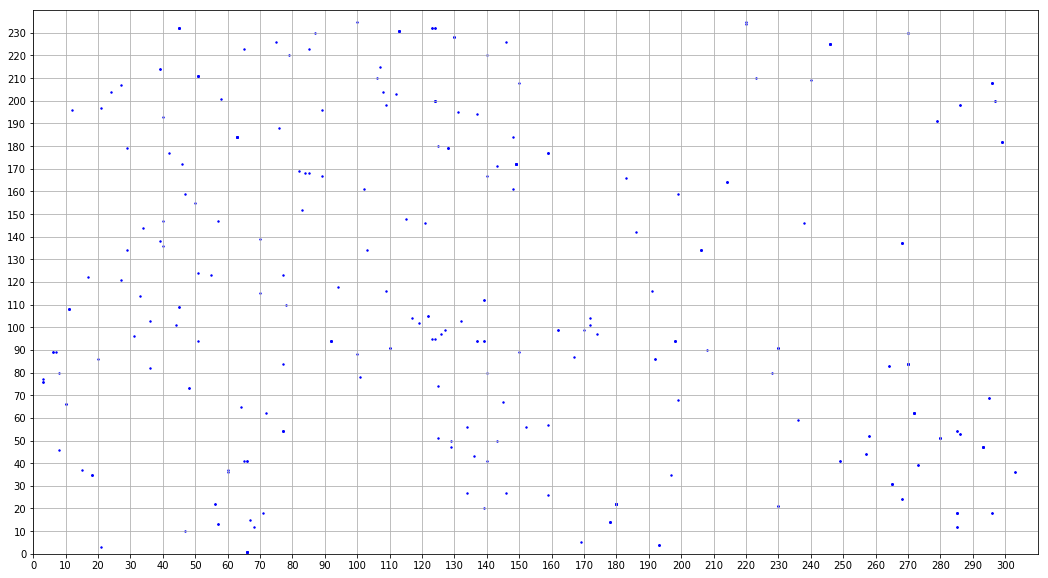

In [88]:
def print_single_frame(frame_index):
    
    subset=frames.get_group(frame_index)
    xmax=310
    ymax=240
    
    x_ticks=[i for i in range(0,xmax,10)]
    y_ticks=[i for i in range(0,ymax,10)]
    
    f=plt.figure(figsize=(18,10))
    
    plt.scatter(subset.X.values,subset.Y.values,c='b',s=2.0)
    
    
    plt.xticks(ticks=x_ticks)
    plt.yticks(ticks=y_ticks)
    
    plt.grid()
    plt.xlim(0,xmax)
    plt.ylim(0,ymax)
    
print_single_frame(110)

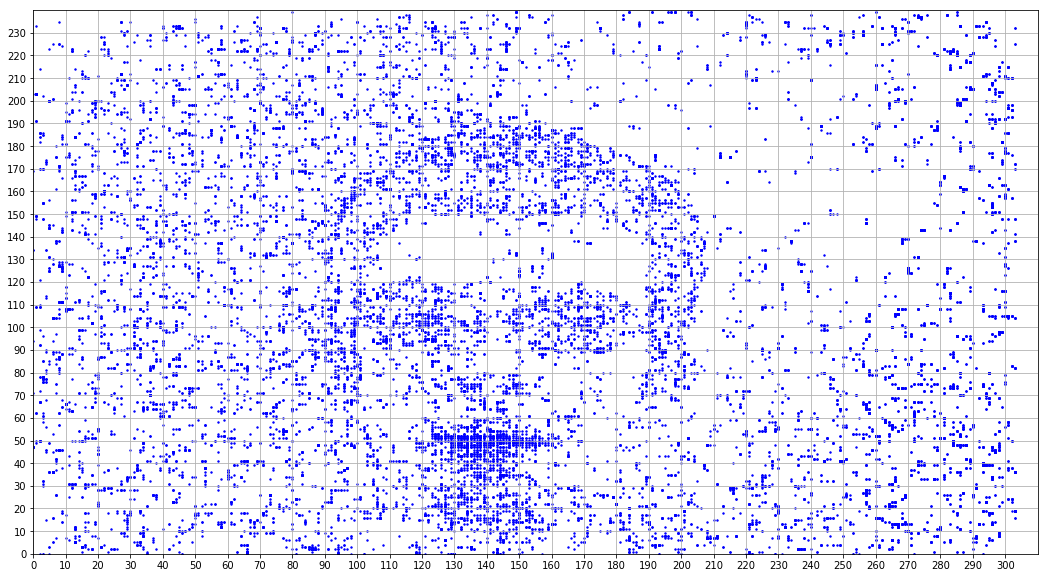

In [98]:
def print_multiple_frames(start_frame,end_frame):
    
    subset=[]
    for frame in range(start_frame,end_frame):
        if frame in non_empty_frames:
            subset.append(frames.get_group(frame))
    subset=pd.concat(subset,axis=0)
    xmax=310
    ymax=240
    
    x_ticks=[i for i in range(0,xmax,10)]
    y_ticks=[i for i in range(0,ymax,10)]
    
    f=plt.figure(figsize=(18,10))
    
    plt.scatter(subset.X.values,subset.Y.values,c='b',s=2.0)
    
    
    plt.xticks(ticks=x_ticks)
    plt.yticks(ticks=y_ticks)
    
    plt.grid()
    plt.xlim(0,xmax)
    plt.ylim(0,ymax)
    
print_multiple_frames(0,150)

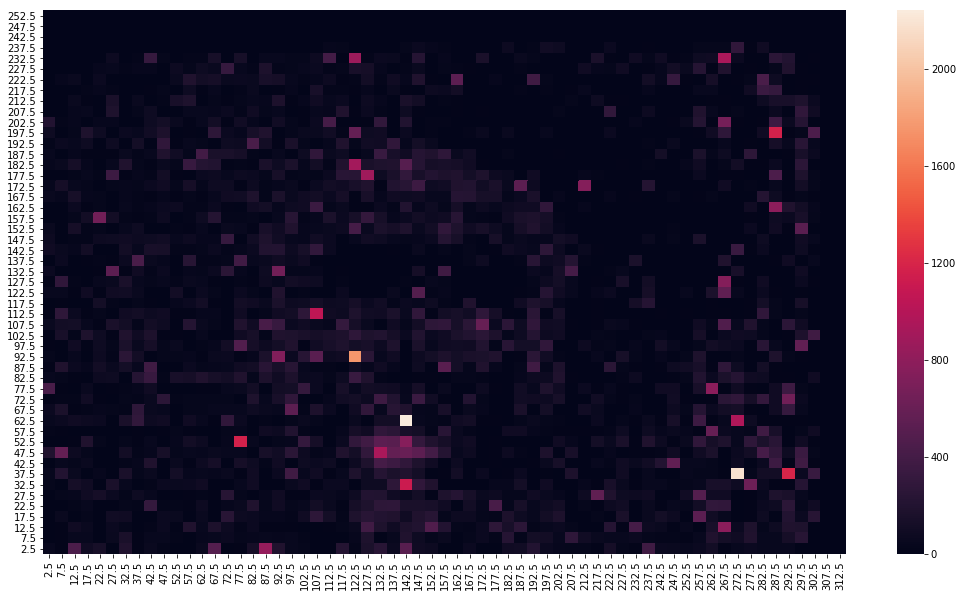

In [97]:
import seaborn as sns

def print_spatial_average_multiframe(start_frame,end_frame,box_size=10):
    
    xmax=310
    ymax=250
    x_boxes=[i for i in range(0,xmax+1,box_size)]
    y_boxes=[i for i in range(0,ymax+1,box_size)]
    
    x_boxes_index=[i for i in range(len(x_boxes)-1)]
    y_boxes_index=[i for i in range(len(y_boxes)-1)]
    
    subset=[]
    for frame in range(start_frame,end_frame):
        if frame in non_empty_frames:
            subset.append(frames.get_group(frame))
            
    subset=pd.concat(subset,axis=0)
    
    
    subset['X_box'] = pd.cut(subset['X'],x_boxes,labels=x_boxes_index,include_lowest=True)
    subset['Y_box'] = pd.cut(subset['Y'],y_boxes,labels=y_boxes_index,include_lowest=True)

    x_centers = [ (x_boxes[i]+x_boxes[i+1])/2 for i in range(len(x_boxes)-1)]
    x_centers.append(x_boxes[-1]+box_size/2)
    
    y_centers = [ (y_boxes[i]+y_boxes[i+1])/2 for i in range(len(y_boxes)-1)]
    y_centers.append(y_boxes[-1]+box_size/2)

    data_grained = subset.groupby(['X_box','Y_box'])
    heatmap=np.zeros((len(x_boxes),len(y_boxes)))
    
    fig = plt.figure(figsize=(18,10))
    
    for key in data_grained.groups.keys():
        #print('({},{}) = {}'.format(key[0],key[1],data_grained.get_group(key).size))
        heatmap[key[0],key[1]]=data_grained.get_group(key).size
        
    '''
    for x in x_boxes_index:
        for y in y_boxes_index:
            if (x,y) in data_grained.groups.keys():
                #print('({},{}) = {}'.format(x,y,data_grained.get_group((x,y)).size))
                heatmap[x,y]=data_grained.get_group((x,y)).size
                
    '''            
    #heatmap=np.transpose(heatmap)
    heatmap=np.rot90(heatmap,1)
    #print(heatmap)
    sns.heatmap(heatmap,xticklabels=x_centers,yticklabels=y_centers[::-1])
    
print_spatial_average_multiframe(0,150,5)